In [37]:
#import libraries
#to perform numerical operations
import numpy as np
#to laod the predefined dataset
from sklearn.datasets import load_iris
#to split the dataset
from sklearn.model_selection import train_test_split
#to scale the data
from sklearn.preprocessing import StandardScaler
#to show tp tn fp fn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [38]:
#to laod the data
data = load_iris()
X = data.data
y = data.target

In [39]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [40]:
X.shape

(150, 4)

In [41]:
y.shape

(150,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#to build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
#Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose = 0)

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (16, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(16, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python

In [47]:
#evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3000 - loss: 0.0000e+00
Test Accuracy: 0.30000001192092896


In [48]:
#make the prediction
sample = X_test[0].reshape(1, -1)
pred = model.predict(sample)
print("Predicted Probability:", pred[0][0])
print("Predicted Class:", 1 if pred[0][0] > 0.5 else 0)

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Probability: 1.0
Predicted Class: 1


In [49]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [50]:
for i in range(len(y_pred)):
    y_pred[i][0] = 1 if y_pred[i][0] > 0.5 else 0

In [51]:
y_pred.shape

(30, 1)

In [52]:
y_test.shape

(30,)

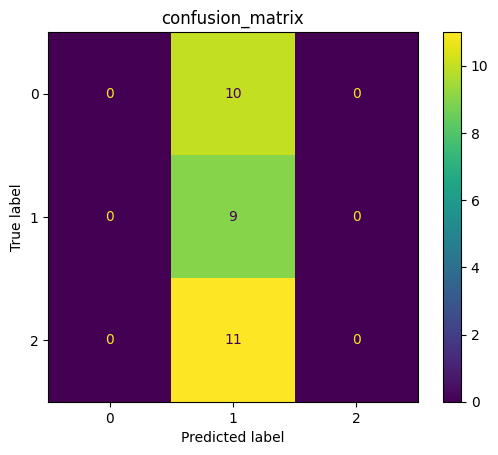

In [53]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("confusion_matrix")
plt.show()